In [3]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5

In [17]:
file = h5.File('../lcdm150.h5')

In [18]:
list(file.keys())

['potential']

In [19]:
data = file['potential']

In [20]:
data[1]

array([[-464.22157895, -487.43789788, -503.739509  , ..., -460.41221207,
        -456.19805224, -452.13337714],
       [-450.72385068, -461.37369004, -473.53401652, ..., -456.71201596,
        -450.78150204, -446.10592033],
       [-442.08693034, -440.03821824, -444.68934943, ..., -461.66378439,
        -452.3684794 , -445.3900236 ],
       ...,
       [-554.41339414, -575.92180596, -589.53915391, ..., -537.38175953,
        -534.50086478, -540.65920878],
       [-531.42557448, -551.26138845, -565.52365693, ..., -518.67625448,
        -515.72348272, -521.50935022],
       [-497.5102193 , -514.07993993, -534.77467784, ..., -485.105883  ,
        -482.17109586, -486.04027568]])

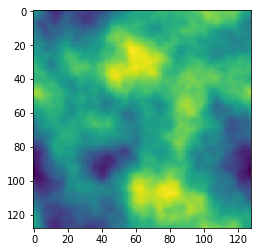

In [21]:
plt.imshow(data[50])

In [22]:
X = (np.arange(128)*150./128)[np.indices([128,128,128])]

In [23]:
X_abs = np.sqrt((X**2).sum(axis=0))

In [24]:
Y = (X + 150/2) % 150 - 150/2

In [25]:
Y_abs = np.sqrt((Y**2).sum(axis=0))

In [26]:
mask = np.where(Y_abs < 8.0, 1.0, 0.0)
mask /= mask.sum()

In [27]:
from numpy import fft

In [28]:
filtered = fft.ifftn(fft.fftn(data) * fft.fftn(mask)).real

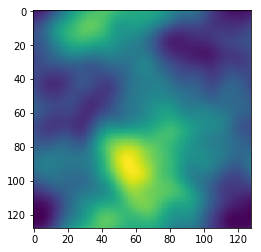

In [29]:
plt.imshow(filtered[0])

In [78]:
filtered.std()

3.0416129100629163

In [79]:
data[:].std()

20.702835356287846

In [80]:
q = fft.fftn(mask)

In [82]:
z = (q * q.conj()).real

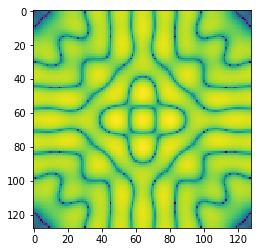

In [85]:
plt.imshow(np.log(z[50]))

In [30]:
file.close()